In [1]:
#import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')
sns.set_style('darkgrid')

from collections import Counter
import random

In [2]:
#reading of the dataset with pandas
df = pd.read_csv(r"C:\Users\HP 2022\Downloads\Customer-Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#checking for the null values and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#checking for NAN values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot: >

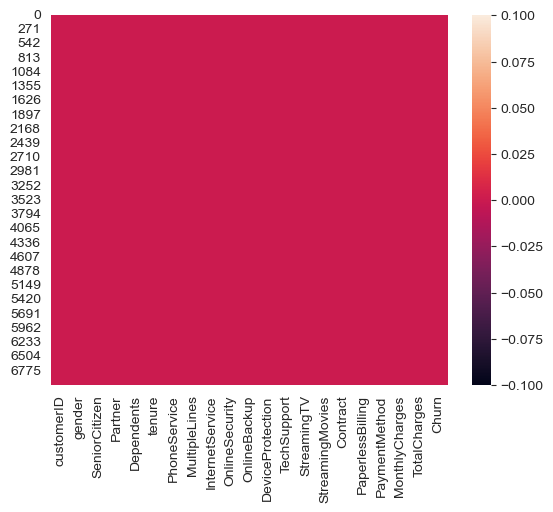

In [5]:
#visualization of NAN values
sns.heatmap(df.isnull())

In [6]:
#checking for duplicate entries
df.duplicated().sum()

0

In [7]:
#checking for unique values of each feature
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
#checking for correct format of data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
#converting the data type of Monthly charges from object to float
df=df[df["TotalCharges"].str.strip() != '']
df["TotalCharges"]=df["TotalCharges"].astype(float)
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [10]:
df.loc[df['Churn'] == "Yes", "Churn"]="Churned"
df.loc[df['Churn'] == "No", "Churn"]="Retained"

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


###### insights:
**the dataset contains**: 
- 7043 entries with no missing value 
- no duplicates entries
- 4 numerical variables and 17 categorical variables
- for the features of SeniorCitizen, tenure, TotalCharges are Right-Skewed(Positive Skewed) while MonthlyCharges is Left-Skewed(Negative Skewed)

### Data Dictionary
- 1. **CustomerID:** A unique identifier assigned to each telecom customer, enabling tracking and identification of individual customers.
- 2. **Gender:** The gender of the customer, which can be categorized as male, or female. This information helps in analyzing gender-based trends in customer churn.
- 3. **SeniorCitizen:** A binary indicator that identifies whether the customer is a senior citizen or not. This attribute helps in understanding if there are any specific churn patterns among senior customers.
- 4. **Partner:** Indicates whether the customer has a partner or not. This attribute helps in evaluating the impact of having a partner on churn behavior.
- 5. **Dependents:** Indicates whether the customer has dependents or not. This attribute helps in assessing the influence of having dependents on customer churn.
- 6. **Tenure:** The duration for which the customer has been subscribed to the telecom service. It represents the loyalty or longevity of the customer’s relationship with the company and is a significant predictor of churn.
- 7. **PhoneService:** Indicates whether the customer has a phone service or not. This attribute helps in understanding the impact of phone service on churn.
- 8. **MultipleLines:** Indicates whether the customer has multiple lines or not. This attribute helps in analyzing the effect of having multiple lines on customer churn.
- 9. **InternetService:** Indicates the type of internet service subscribed by the customer, such as DSL, fiber optic, or no internet service. It helps in evaluating the relationship between internet service and churn.
- 10. **OnlineSecurity:** Indicates whether the customer has online security services or not. This attribute helps in analyzing the impact of online security on customer churn.
- 11. **OnlineBackup:** Indicates whether the customer has online backup services or not. This attribute helps in evaluating the impact of online backup on churn behavior.
- 12. **DeviceProtection:** Indicates whether the customer has device protection services or not. This attribute helps in understanding the influence of device protection on churn.
- 13. **TechSupport:** Indicates whether the customer has technical support services or not. This attribute helps in assessing the impact of tech support on churn behavior.
- 14. **StreamingTV:** Indicates whether the customer has streaming TV services or not. This attribute helps in evaluating the impact of streaming TV on customer churn.
- 15. **StreamingMovies:** Indicates whether the customer has streaming movie services or not. This attribute helps in understanding the influence of streaming movies on churn behavior.
- 16. **Contract:** Indicates the type of contract the customer has, such as a month-to-month, one-year, or two-year contract. It is a crucial factor in predicting churn as different contract lengths may have varying impacts on customer loyalty.
- 17. **PaperlessBilling:** Indicates whether the customer has opted for paperless billing or not. This attribute helps in analyzing the effect of paperless billing on customer churn.
- 18. **PaymentMethod:** Indicates the method of payment used by the customer, such as electronic checks, mailed checks, bank transfers, or credit cards. This attribute helps in evaluating the impact of payment methods on churn.
- 19. **MonthlyCharges:** The amount charged to the customer on a monthly basis. It helps in understanding the relationship between monthly charges and churn behavior.
- 20. **TotalCharges:** The total amount charged to the customer over the entire tenure. It represents the cumulative revenue generated from the customer and may have an impact on churn.
- 21. **Churn:** The target variable indicates whether the customer has churned (canceled the service) or not. It is the main variable to predict in telecom customer churn analysis.


# Exploratory Data Analysis

In [12]:
#checking the dataset columns
print(df.columns)
print('--------------------------------------------------------------------------------------')
print(df.shape)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
--------------------------------------------------------------------------------------
(7032, 21)


The Count of Gender:
Male      3549
Female    3483
Name: gender, dtype: int64


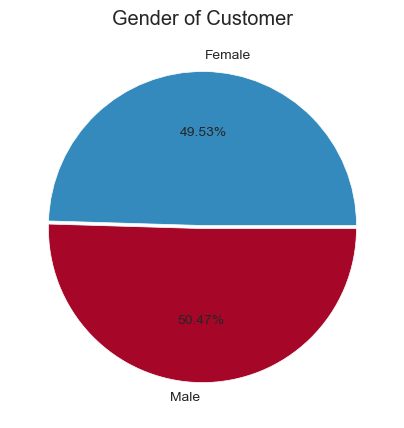

In [13]:
#share of Gender 
value = df['gender'].value_counts()
print('The Count of Gender:')
print(value)
fig, ax=plt.subplots(figsize=(5,5))
count = Counter(df['gender'])
ax.pie(count.values(),explode=(0,0.02),labels=count.keys(), autopct=lambda x: f'{x:.2f}%')
ax.set_title('Gender of Customer')
plt.show();


##### insights:
- This suggests that there are slightly more male customers (3549) than female customers (3483).

The Count of Churn:
Retained    5163
Churned     1869
Name: Churn, dtype: int64


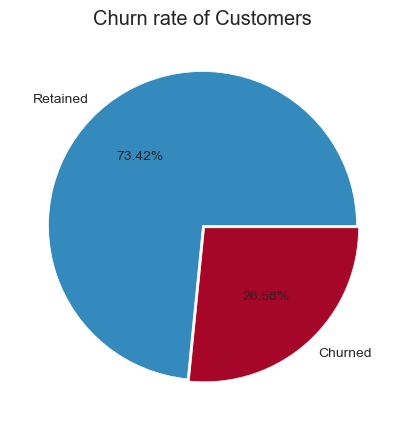

In [14]:
#displaying percentage of Churned customers
value = df['Churn'].value_counts()
print('The Count of Churn:')
print(value)
fig, ax=plt.subplots(figsize=(5,5))
count = Counter(df['Churn'])
ax.pie(count.values(),explode=(0,0.02),labels=count.keys(), autopct=lambda x: f'{x:.2f}%')
ax.set_title('Churn rate of Customers')
plt.show();

##### insight:
- The count of churn indicates the number of customers who have either retained their service ("Retained") and churned, meaning they have canceled their service ("Churned"). In this case, there are 5163 customers who have retained their service and 1869 customers who have churned.

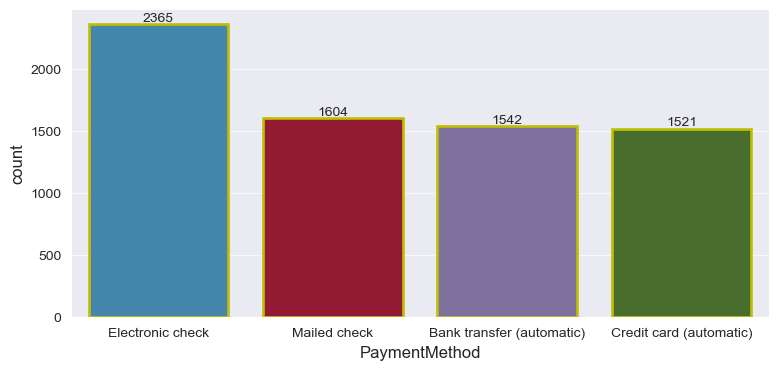

In [15]:
#displaying means of payment method by count
plt.figure(figsize=(9,4))
ax = sns.countplot(x=df["PaymentMethod"], order=df["PaymentMethod"].value_counts(ascending=False).index,ec='y',lw=1.9)
values = df["PaymentMethod"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0],labels=values);

In [16]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Text(0.5, 1.0, 'Total Number of Citizens')

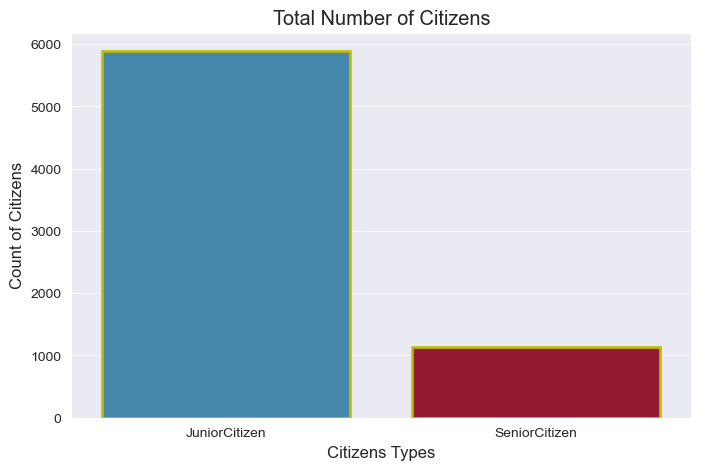

In [17]:
#seperating senior citizens from junior citizens
def SeniorCitizens(citizen):
    if citizen == 1:
        return 'SeniorCitizen'
    else:
        return 'JuniorCitizen'
    

df['CitizensType']=df['SeniorCitizen'].apply(SeniorCitizens) 

plt.figure(figsize = (8,5))
sns.countplot(x='CitizensType', data=df,ec='y',lw=1.9)
plt.xlabel('Citizens Types')
plt.ylabel('Count of Citizens')
plt.title('Total Number of Citizens')

The Count of CitizensType:
JuniorCitizen    5890
SeniorCitizen    1142
Name: CitizensType, dtype: int64
----------------------------------------------------


Text(0.5, 1.0, 'Total Number of Citizens')

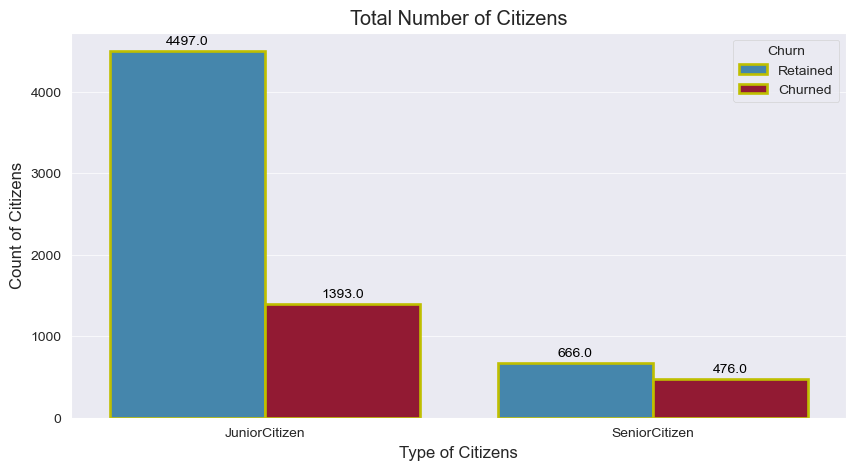

In [18]:
#investigating the Type of Citizen of Customers by target feature
value = df['CitizensType'].value_counts()
print('The Count of CitizensType:')
print(value)
print("----------------------------------------------------")
plt.figure(figsize=(10,5))
values = df['CitizensType'].value_counts(ascending=False).index
ax= sns.countplot(x='CitizensType',data=df, order=values, hue = 'Churn',ec='y',lw=1.9)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.xlabel('Type of Citizens')
plt.ylabel('Count of Citizens')
plt.title('Total Number of Citizens')

##### Insights:
- Senior Citizen has higher churned rate than Junior Citizen

The Count of Dependents:
No     4933
Yes    2099
Name: Dependents, dtype: int64
----------------------------------------------------


Text(0.5, 1.0, 'Total Number of Dependents')

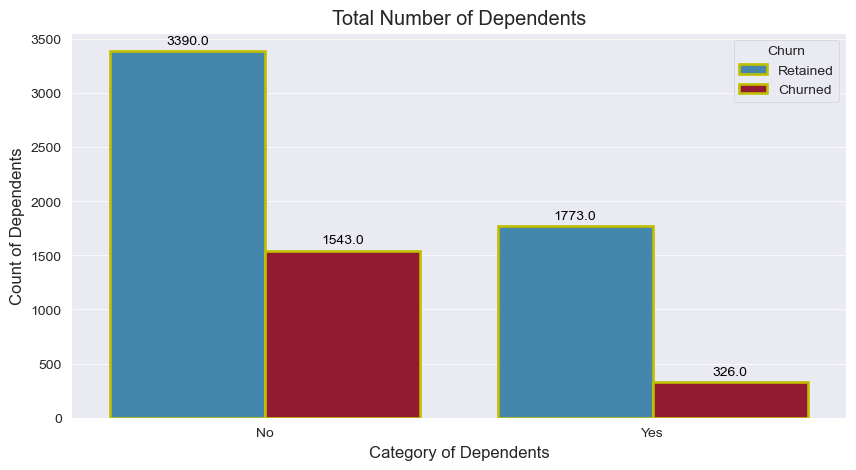

In [19]:
#investigating the Category of Dependents of Customers by target feature
value = df['Dependents'].value_counts()
print('The Count of Dependents:')
print(value)
print("----------------------------------------------------")
plt.figure(figsize=(10,5))
values = df['Dependents'].value_counts(ascending=False).index
ax= sns.countplot(x='Dependents',data=df, order=values, hue = 'Churn',ec='y',lw=1.9)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.xlabel('Category of Dependents')
plt.ylabel('Count of Dependents')
plt.title('Total Number of Dependents')

##### Insights:
- Non dependent Customers has higher churned rate than Dependent Customers

The Count of Partner:
No     3639
Yes    3393
Name: Partner, dtype: int64
----------------------------------------------------


Text(0.5, 1.0, 'Total Number of Partner')

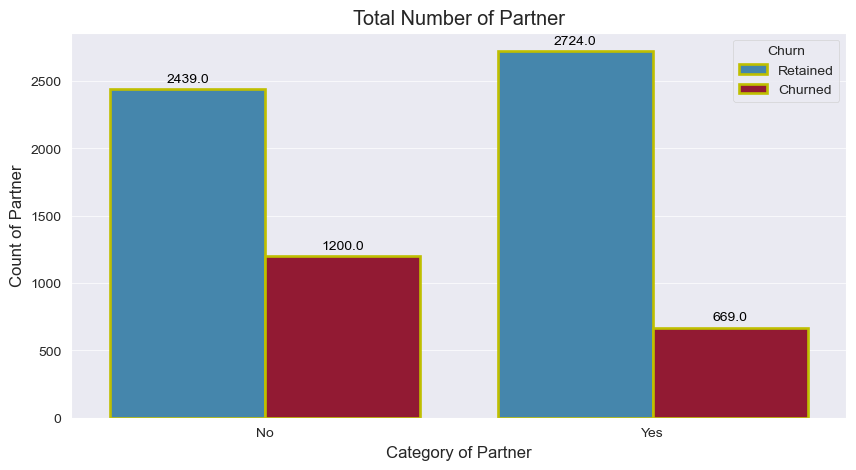

In [20]:
#investigating the Category of Partner of Customers by target feature
value = df['Partner'].value_counts()
print('The Count of Partner:')
print(value)
print("----------------------------------------------------")
plt.figure(figsize=(10,5))
values = df['Partner'].value_counts(ascending=False).index
ax= sns.countplot(x='Partner',data=df, order=values, hue = 'Churn',ec='y',lw=1.9)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.xlabel('Category of Partner')
plt.ylabel('Count of Partner')
plt.title('Total Number of Partner')

##### Insights:
- Customers without partner has higher churned rate than Customers with partner

The Count of TechSupport:
No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64
----------------------------------------------------


Text(0.5, 1.0, 'Total Number of TechSupport')

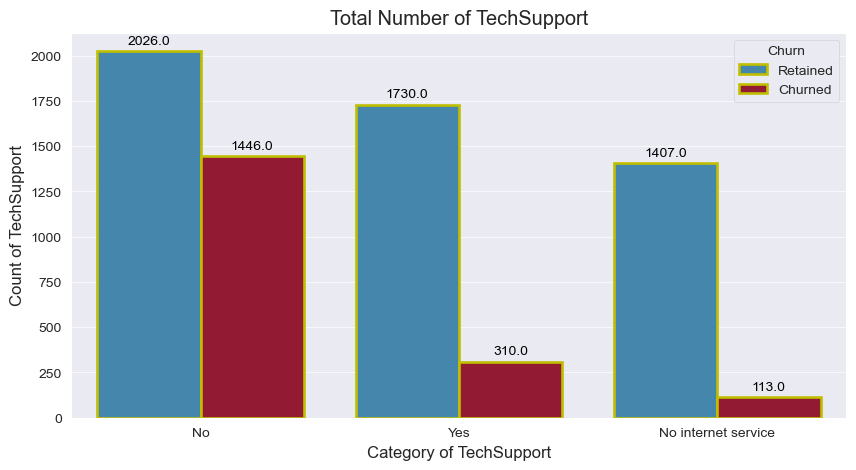

In [21]:
#investigating the Category of Tech Support of Customers by target feature
value = df['TechSupport'].value_counts()
print('The Count of TechSupport:')
print(value)
print("----------------------------------------------------")
plt.figure(figsize=(10,5))
values = df['TechSupport'].value_counts(ascending=False).index
ax= sns.countplot(x='TechSupport',data=df, order=values, hue = 'Churn',ec='y',lw=1.9)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.xlabel('Category of TechSupport')
plt.ylabel('Count of TechSupport')
plt.title('Total Number of TechSupport')

##### Insights:
- Customers without tech support have a higher churn rate, followed by customers with tech support, and the least churn rate is observed among customers with no internet

The Count of Contract:
Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64
----------------------------------------------------


Text(0.5, 1.0, 'Total Number of Contract')

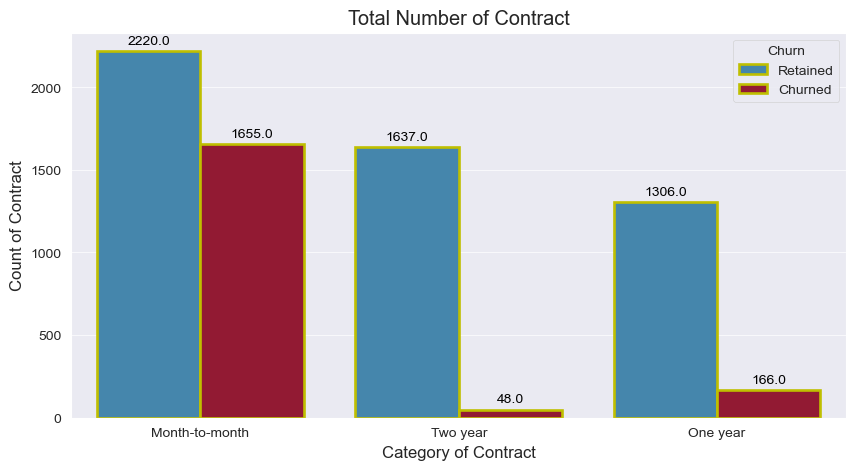

In [22]:
#investigating the Category of Contract of Customers by target feature
value = df['Contract'].value_counts()
print('The Count of Contract:')
print(value)
print("----------------------------------------------------")
plt.figure(figsize=(10,5))
values = df['Contract'].value_counts(ascending=False).index
ax= sns.countplot(x='Contract',data=df, order=values, hue = 'Churn',ec='y',lw=1.9)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.xlabel('Category of Contract')
plt.ylabel('Count of Contract')
plt.title('Total Number of Contract')

##### Insights:
- Customers with contract of Month-to-month have a higher churn rate, followed by customers with One-year contract, and the least churn rate is observed among customers with Two-years contract

In [23]:
#The correlation coefficient is a statistical measure that describes the strength
#and direction of a linear relationship between two variables. The correlation values range from -1 to 1:
#1: Perfect positive correlation
#0: No correlation
#-1: Perfect negative correlation
df.corr()

C:\Users\HP 2022\AppData\Local\Temp\ipykernel_8416\1147144004.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


C:\Users\HP 2022\AppData\Local\Temp\ipykernel_8416\1380867386.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt='.2f',square=True,cmap='RdYlGn')


<AxesSubplot: >

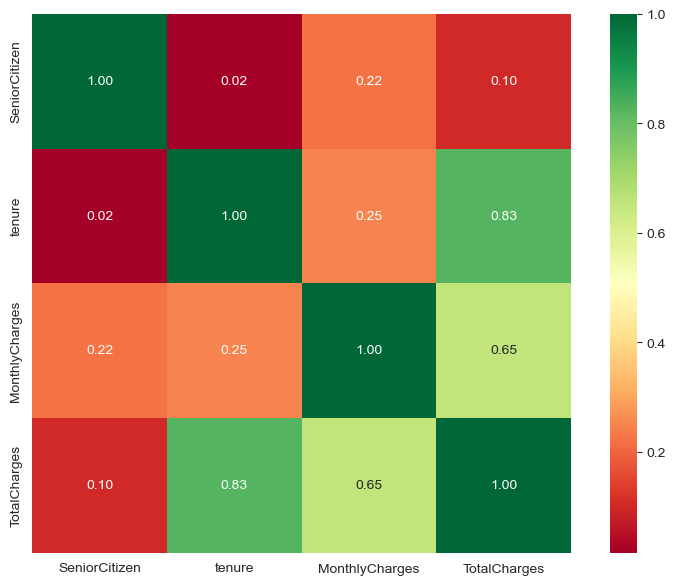

In [24]:
#The resulting plot provides a visual representation of the correlation between variables in the DataFrame,
#with annotated values indicating the strength and direction of the correlation.
fig,ax=plt.subplots(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,fmt='.2f',square=True,cmap='RdYlGn')

##### Insights: 
- From the correlation matrix provided, we can derive several insights:

    SeniorCitizen and MonthlyCharges: There is a moderate positive correlation (0.219874) between being a senior citizen and monthly charges. This suggests that senior citizens tend to have slightly higher monthly charges compared to non-senior citizens.

    tenure and MonthlyCharges: There is a weak positive correlation (0.246862) between tenure (duration of subscription) and monthly charges. This implies that as the duration of a customer's subscription increases, there is a slight tendency for their monthly charges to also increase.

    tenure and TotalCharges: There is a strong positive correlation (0.825880) between tenure and total charges over the entire tenure. This indicates that customers who have been subscribed for a longer duration tend to have higher total charges, which is intuitive as they have been using the service for a longer period.

    MonthlyCharges and TotalCharges: There is a moderate positive correlation (0.651065) between monthly charges and total charges. This suggests that customers with higher monthly charges tend to accumulate higher total charges over time.
    
    

- Overall, these correlations provide valuable insights into the relationship between customer demographics (such as being a senior citizen), tenure, and the financial aspects of their subscriptions (monthly charges and total charges). These insights can help in understanding customer behavior, designing pricing strategies, and optimizing retention efforts.

C:\Users\HP 2022\anaconda3\envs\matplotlib\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


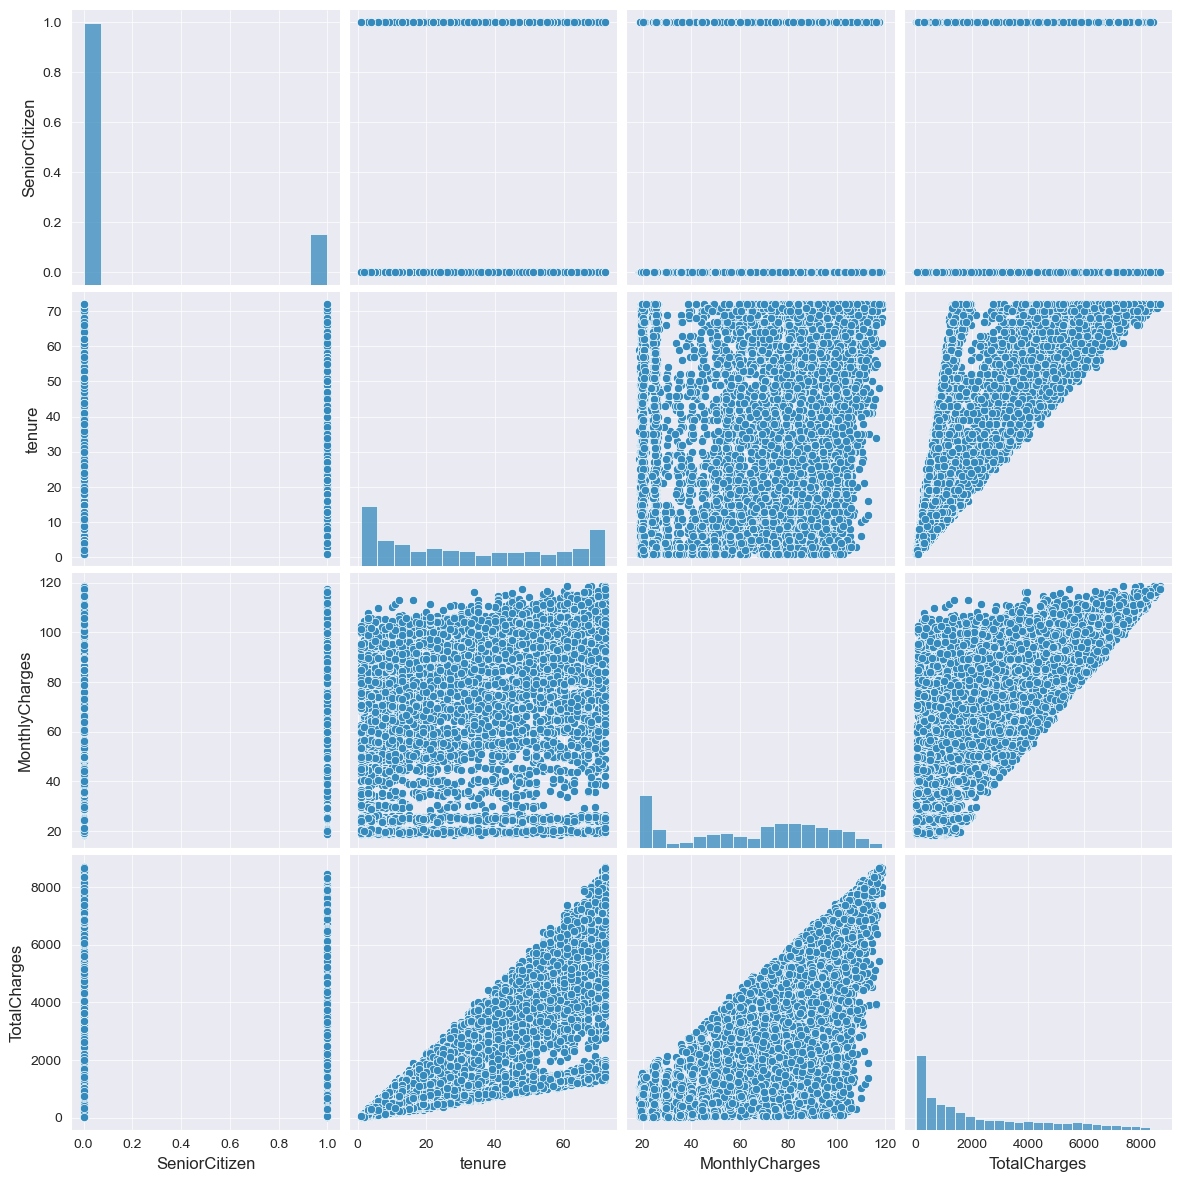

In [25]:
#The pair plot allows the inspectation of the relationships between different pairs of variables in the dataset. 
sns.pairplot(df, size=3)

# Predicting Customer Churn

In [26]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,CitizensType
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Retained,JuniorCitizen
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,Retained,JuniorCitizen
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Churned,JuniorCitizen
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,Retained,JuniorCitizen
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Churned,JuniorCitizen


In [27]:
df.drop('CitizensType', axis=1, inplace=True)
df.drop('customerID', axis=1, inplace=True)

In [28]:
#segment data
y = df.pop('Churn')

In [29]:
#using label encoder to convert categorical labels into numerical format
from sklearn.preprocessing import MinMaxScaler, RobustScaler, LabelEncoder
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [30]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
7038,1,0,1,1,23,1,2,0,2,0,2,2,2,2,1,1,3,990,3700
7039,0,0,1,1,71,1,2,1,0,2,2,0,2,2,1,1,1,1339,6304
7040,0,0,1,1,10,0,1,0,2,0,0,0,0,0,0,1,2,137,1265
7041,1,1,1,0,3,1,2,1,0,0,0,0,0,0,0,1,3,794,1157
7042,1,0,0,0,65,1,0,1,2,0,2,2,2,2,2,1,0,1387,6150


In [31]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,142,74
1,1,0,0,0,33,1,0,0,2,0,2,0,0,0,1,0,3,497,3624


In [32]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
#instantiate scaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)
df_scaled.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.000000,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.089703,0.011334
1,1.0,0.0,0.0,0.0,0.464789,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.313961,0.555062


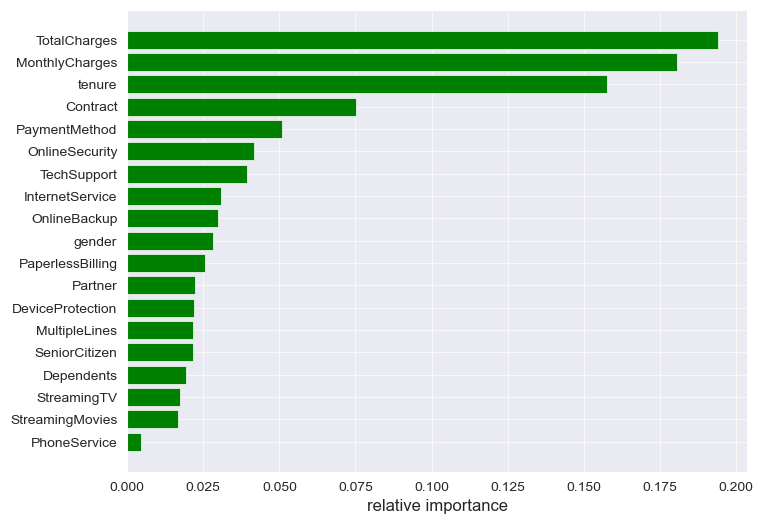

In [33]:
#identify the key predictor features in the dataset
from sklearn.ensemble import RandomForestClassifier

feat_model = RandomForestClassifier()

#fits model
feat_model.fit(df_scaled,y)
feature_names = list(df_scaled.columns)
importance = feat_model.feature_importances_
indices = np.argsort(importance)

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)),importance[indices],color='green', align="center")
plt.yticks(range(len(indices)),[feature_names[i] for i in indices])
plt.xlabel("relative importance")
plt.show()

In [34]:
#split data in training and evaluation sets
from sklearn.model_selection import train_test_split

X_train,x_test,y_train,y_test =  train_test_split(df_scaled,y,test_size=0.3,random_state=1)

In [35]:
X_train.shape,x_test.shape

((4922, 19), (2110, 19))

In [36]:
#importing predictive models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [37]:
#instantiate models
log_reg = LogisticRegression()
dec_tree = DecisionTreeClassifier()
gb_clf = GradientBoostingClassifier()
ran_for = RandomForestClassifier()

In [38]:
#training the models
log_reg.fit(X_train,y_train)
dec_tree.fit(X_train,y_train)
gb_clf.fit(X_train,y_train)
ran_for.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
#creating a predictions file for all models
log_pred = log_reg.predict(x_test)
dec_pred = dec_tree.predict(x_test)
gb_pred = gb_clf.predict(x_test)
rf_pred = ran_for.predict(x_test)

In [40]:
gb_pred

array(['Retained', 'Churned', 'Retained', ..., 'Retained', 'Churned',
       'Retained'], dtype=object)

In [41]:
#importing evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
#defining a function that uses the scikit-learn library to generate a confusion matrix based on the model's predictions.
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="",cmap='coolwarm_r')
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [43]:
#classification_report
print("classification report for the logistic regression model \n",classification_report(y_test,log_pred))

classification report for the logistic regression model 
               precision    recall  f1-score   support

     Churned       0.66      0.53      0.58       555
    Retained       0.84      0.90      0.87      1555

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.80      2110



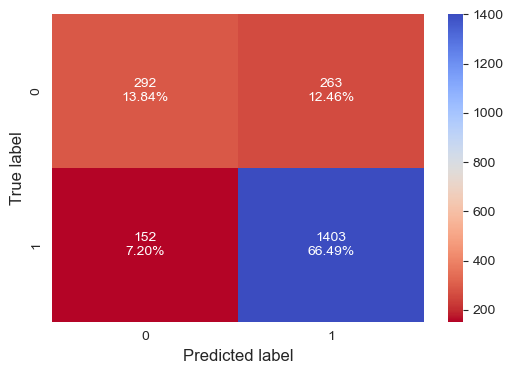

In [44]:
confusion_matrix_sklearn(log_reg,x_test,y_test)

In [45]:
print("classification report for the decision tree model \n",classification_report(y_test,dec_pred))

classification report for the decision tree model 
               precision    recall  f1-score   support

     Churned       0.47      0.51      0.49       555
    Retained       0.82      0.79      0.81      1555

    accuracy                           0.72      2110
   macro avg       0.64      0.65      0.65      2110
weighted avg       0.73      0.72      0.72      2110



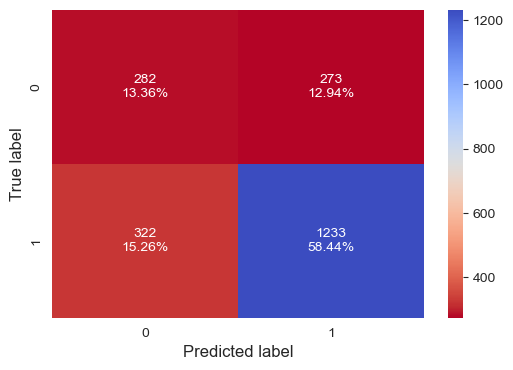

In [46]:
confusion_matrix_sklearn(dec_tree,x_test,y_test)

In [47]:
print("classification report for the gradient boosting model \n",classification_report(y_test,gb_pred))

classification report for the gradient boosting model 
               precision    recall  f1-score   support

     Churned       0.67      0.51      0.58       555
    Retained       0.84      0.91      0.87      1555

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



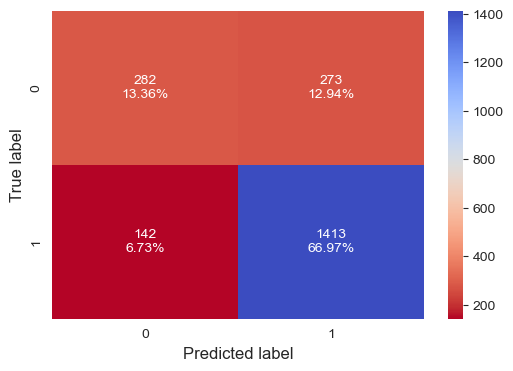

In [48]:
confusion_matrix_sklearn(gb_clf,x_test,y_test)

In [49]:
#classification_report
print("classification report for the random forest model \n",classification_report(y_test,rf_pred))

classification report for the random forest model 
               precision    recall  f1-score   support

     Churned       0.62      0.50      0.55       555
    Retained       0.83      0.89      0.86      1555

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



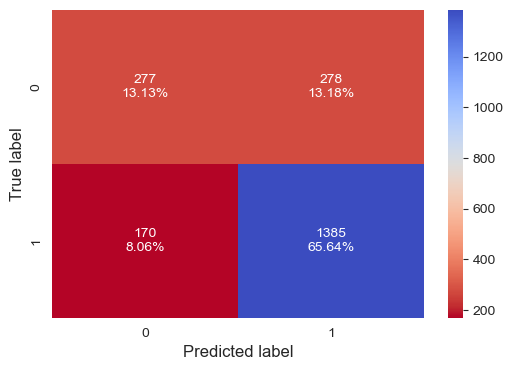

In [50]:
confusion_matrix_sklearn(ran_for,x_test,y_test)

## Hyperparameter tuning

In [51]:
#hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,r2_score
import random

In [52]:
opt_model = LogisticRegression()

# Define the hyperparameter grid to search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
    
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=opt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [55]:
#measuring performance on evaluation set
best_model = grid_search.best_estimator_
best_pred = best_model.predict(x_test)
best_pred

array(['Retained', 'Churned', 'Retained', ..., 'Retained', 'Retained',
       'Retained'], dtype=object)

In [56]:
print("classification report for optimzed logistic regression model \n",classification_report(y_test,best_pred))

classification report for optimzed logistic regression model 
               precision    recall  f1-score   support

     Churned       0.65      0.51      0.57       555
    Retained       0.84      0.90      0.87      1555

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



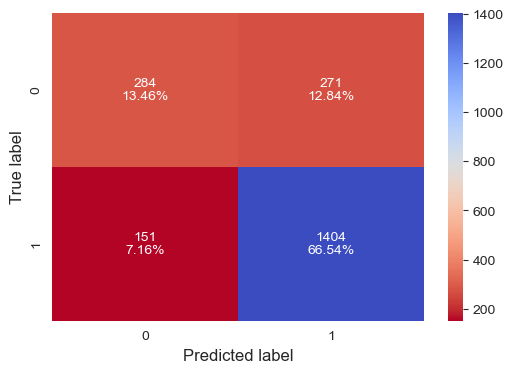

In [58]:
confusion_matrix_sklearn(best_model,x_test,y_test)

# Productionizing the Model

In [59]:
#Productionizing models
import joblib

filename = './log_model.pkl'
joblib.dump(log_reg,filename)

['./log_model.pkl']

In [60]:
import pickle
import os

# Ensure the 'data' directory exists
os.makedirs('data', exist_ok=True)

# Your model-saving code
with open(f'data/logs_model.pkl', 'wb') as f:
    pickle.dump(log_reg, f)
